In [2]:
import tensorflow as tf
In [2]: tf.__version__

'1.3.0'

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/data/", one_hot=True)

Extracting /data/train-images-idx3-ubyte.gz
Extracting /data/train-labels-idx1-ubyte.gz
Extracting /data/t10k-images-idx3-ubyte.gz
Extracting /data/t10k-labels-idx1-ubyte.gz


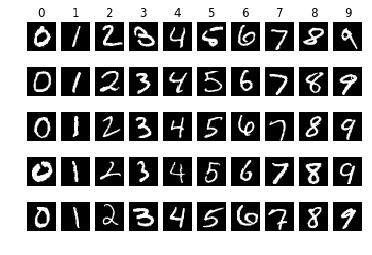

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

for i in range(10):
    digits = np.argmax(mnist.test.labels, 1)
    indexes = (digits == i)
    images = mnist.test.images[indexes][0:5]

    for j in range(5):   
        plt.subplot(5, 10, j * 10 + i + 1)
        plt.imshow(images[j].reshape(28, 28), cmap='gray')
        if j == 0:
            plt.title(i)
        plt.axis('off')
plt.show()

In [5]:
def weight_variable(shape):
  initial = tf.zeros(shape)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.zeros(shape)
  return tf.Variable(initial)

Initialising...
1100 batches per epoch
0  0  0.11938  0.11291


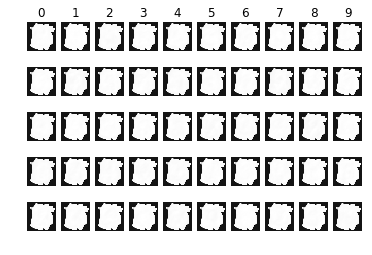

0  1  0.11318  0.11188


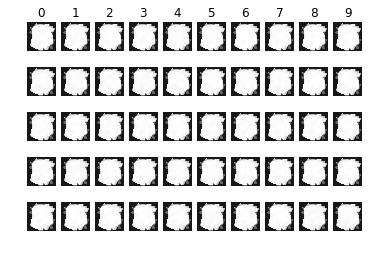

0  2  0.11147  0.11086


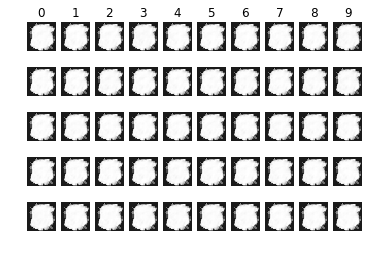

0  4  0.11057  0.10887


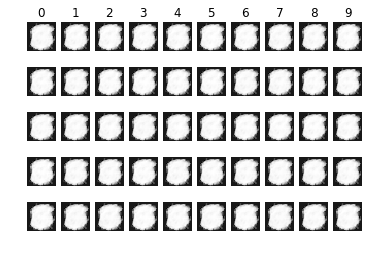

0  7  0.10626  0.10609


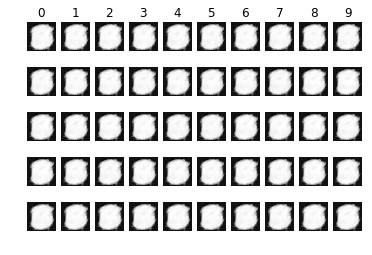

0  12  0.09951  0.10208


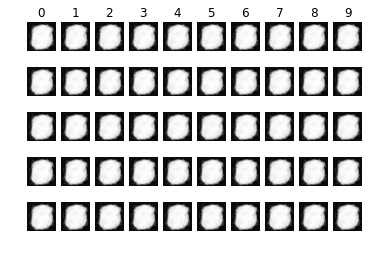

0  20  0.10139  0.09616


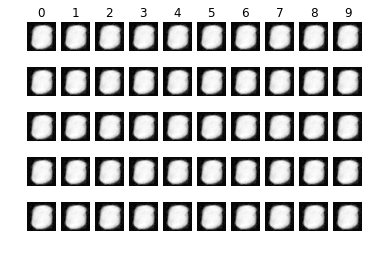

0  33  0.08979  0.08840


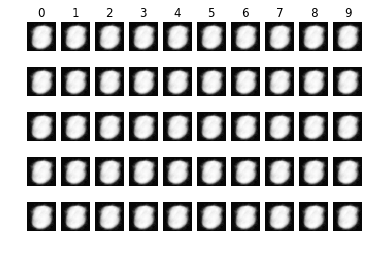

0  54  0.07502  0.07985


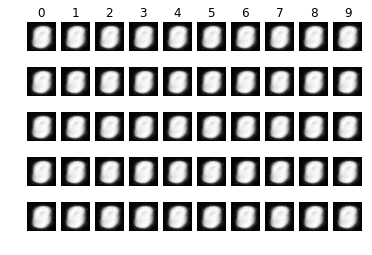

0  88  0.07143  0.07236


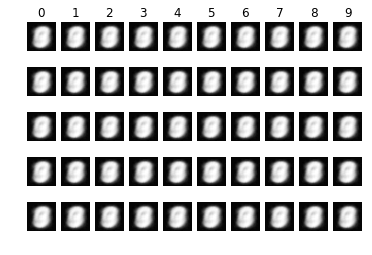

0  143  0.07186  0.06849


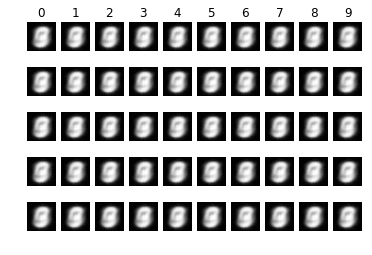

0  232  0.06578  0.06756


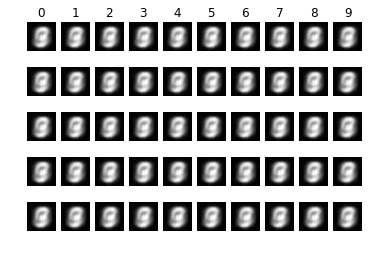

0  376  0.07060  0.06749


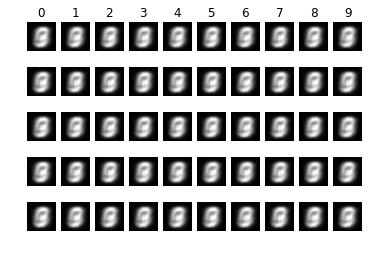

0  609  0.06933  0.06748


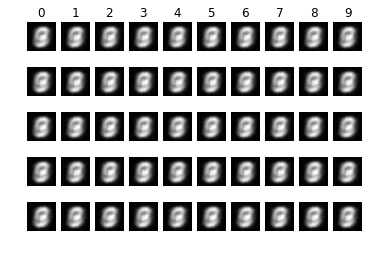

0  986  0.06532  0.06748


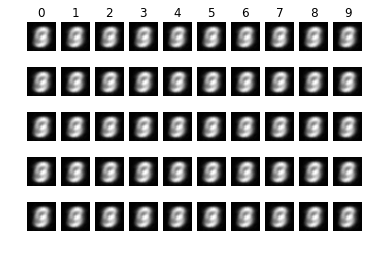

1  496  0.07183  0.06754


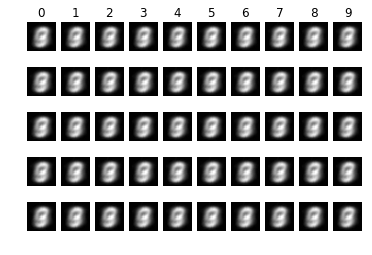

2  383  0.06459  0.06747


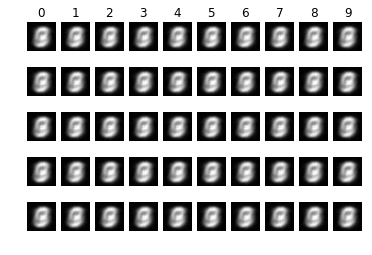

In [ ]:
print('Initialising...')

input_size = 784
encode_dims = 10
hidden_size = 500

# input layer (MNIST digit)
x = tf.placeholder("float", [None, input_size])

# encoder
encoder_w1 = weight_variable([input_size, hidden_size])
encoder_b1 = bias_variable([hidden_size])
encoder_y1 = tf.nn.relu(tf.add(tf.matmul(x, encoder_w1), encoder_b1))

encoder_y1_noise = tf.random_normal(shape=tf.shape(encoder_y1), mean=0.0, stddev=0.001, dtype=tf.float32) 

encoder_w2 = weight_variable([hidden_size, hidden_size])
encoder_b2 = bias_variable([hidden_size])
encoder_y2 = tf.nn.relu(tf.add(tf.matmul(tf.add(encoder_y1, encoder_y1_noise), encoder_w2), encoder_b2))

encoder_y2_noise = tf.random_normal(shape=tf.shape(encoder_y2), mean=0.0, stddev=0.001, dtype=tf.float32) 

# encoded
encoder_w3 = weight_variable([hidden_size, encode_dims])
encoder_b3 = bias_variable([encode_dims])
z = tf.add(tf.matmul(tf.add(encoder_y2, encoder_y2_noise), encoder_w3), encoder_b3)

# decoder
decoder_w1 = weight_variable([encode_dims, hidden_size])
decoder_b1 = bias_variable([hidden_size])
decoder_y1 = tf.nn.relu(tf.add(tf.matmul(z, decoder_w1), decoder_b1))

decoder_y1_noise = tf.random_normal(shape=tf.shape(decoder_y1), mean=0.0, stddev=0.001, dtype=tf.float32) 

decoder_w2 = weight_variable([hidden_size, hidden_size])
decoder_b2 = bias_variable([hidden_size])
decoder_y2 = tf.nn.relu(tf.add(tf.matmul(tf.add(decoder_y1, decoder_y1_noise), decoder_w2), decoder_b2))

decoder_y2_noise = tf.random_normal(shape=tf.shape(decoder_y2), mean=0.0, stddev=0.001, dtype=tf.float32) 

# output (re-encoded MNIST digit)
decoder_w3 = weight_variable([hidden_size, input_size])
decoder_b3 = bias_variable([input_size])
y = tf.add(tf.matmul(tf.add(decoder_y2, decoder_y2_noise), decoder_w3), decoder_b3)

loss = tf.losses.mean_squared_error(y, x)

train_step = tf.train.AdamOptimizer(learning_rate=2e-3).minimize(loss)

init = tf.global_variables_initializer()

training_epochs = 100
batch_size = 50

batches_per_epoch = int(mnist.train.num_examples/batch_size)
print('{} batches per epoch'.format(batches_per_epoch))

total_batch_count = 0
last_fibonacci = 1
fibonacci = 1
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        for batch in range(batches_per_epoch):
            batch_images = mnist.train.next_batch(50)
            train_step.run(feed_dict={x: batch_images[0]})
            _, loss_ = sess.run([train_step, loss], feed_dict={x: batch_images[0]})

            total_batch_count = total_batch_count + 1
            is_fibonacci = (total_batch_count == fibonacci)
            finished = (epoch == training_epochs - 1) and (batch == batches_per_epoch - 1)
            if is_fibonacci or finished:
                test_loss, y_ = sess.run([loss, y], feed_dict={x: mnist.test.images})
                print('{}  {}  {:0.5f}  {:0.5f}'.format(epoch, batch, loss_, test_loss))
                for i in range(10):
                    digits = np.argmax(mnist.test.labels, 1)
                    idxs = (digits == i)
                    images =y_[idxs][0:5]
                    for j in range(5):   
                        plt.subplot(5, 10, i + j * 10 + 1)
                        plt.imshow(images[j].reshape(28, 28), cmap='gray')
                        if j == 0:
                            plt.title(i)
                        plt.axis('off')
                plt.show()
                if is_fibonacci:
                    temp = fibonacci
                    fibonacci = last_fibonacci + fibonacci
                    last_fibonacci = temp
